In [1]:

%reload_ext autoreload
%autoreload 2

import sys
# sys.path.append('/home/xilinx/jupyter_notebooks/')
# sys.path.append('D:\\_Lib\\python\\qick\\qick_lib')
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os

import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [2]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import experiments.fitting as fitter
from matplotlib.colors import Normalize

# MY IMPORTS

## Import modules from parent and multimode expts

In [3]:
import json
import os

# Get the current working directory
path = os.getcwd()
print("Current Path:", path)

# Isolate the parent directory
parent_path = path #os.path.dirname(path)
grand_parent_path = os.path.dirname(parent_path)
print("Parent Path:", parent_path)

# Add the parent path to the sys.path
sys.path.append(parent_path)

Current Path: c:\_Lib\python\multimode_expts\analysis_notebooks\RAQM paper
Parent Path: c:\_Lib\python\multimode_expts\analysis_notebooks\RAQM paper


In [4]:
import sys

# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'
saving_dataset_path = r'H:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets'

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks\\RAQM paper', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks\\RAQM paper', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.c

In [5]:
from fitting.fit_display import *

importing from path  C:\_Lib\python\multimode_expts\experiments\clifford_averager_program.py
imported experiments.clifford_averager_program
importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qram_protocol_timestepped.py
imported experiments.qram_protocol_timestepped
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.qubit_cavity.photo_resolved_pulse_probe
impo

In [6]:
import experiments.fitting as fitter
from numpy.linalg import inv

# Exp path

In [7]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs

data_parent =  r'H:\Shared drives\SLab\Multimode\experiment\240911'
expt_path=data_parent+'\\data1'
folder = os.path.join(data_parent, 'RAM_paper_results', 'datasets')
print('Data are extracted from', expt_path)

Data are extracted from H:\Shared drives\SLab\Multimode\experiment\240911\data1


In [8]:
from experiments.dataset import *
from experiments.dataset import storage_man_swap_dataset
import os 

file_name = '\\man1_storage_swap_dataset.csv'
file_path = parent_path +  file_name

ds_stor_man_swap = storage_man_swap_dataset(file_path)

In [9]:
file_path

'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks\\RAQM paper\\man1_storage_swap_dataset.csv'

In [10]:
ds_stor_man_swap.df

,stor_name,freq (MHz),precision (MHz),pi (mus),h_pi (mus),gain (DAC units),last_update
0,M1-S1,349.415,0.010,0.977143,0.488571,3000,2024-10-26 17:42:46.915401
1,M1-S2,520.925,0.010,1.130904,0.565452,5000,2024-10-26 17:43:09.376354
2,M1-S3,696.665,0.010,1.333910,0.666955,9000,2024-10-26 17:43:34.019332
3,M1-S4,875.845,0.010,1.254287,0.627144,9000,2024-10-26 17:43:51.867832
4,M1-S5,1053.395,0.010,1.973198,0.986599,7500,2024-10-26 17:44:14.975970
5,M1-S6,1245.160,0.010,1.595310,0.797655,13500,2024-10-26 17:44:34.143253
6,M1-S7,1423.040,0.010,1.685008,0.842504,13500,2024-10-26 17:44:51.587301
7,M1-S8,-1.000,-1.000,-1.000000,-1.000000,-1,51:31.3
8,M1-S9,-1.000,-1.000,-1.000000,-1.000000,-1,51:31.3
9,M1-S10,-1.000,-1.000,-1.000000,-1.000000,-1,51:31.3


## Load RBAM Expt data

In [11]:
name = 'all_storage_rbam'
folder =  folder # Ensure this variable is defined in your script

# Ensure the folder exists
os.makedirs(folder, exist_ok=True)

# File path to save the DataFrame
file_path = os.path.join(folder, f"{name}.csv")

# Save the DataFrame to a CSV file
df_all_rbam = pd.read_csv(file_path)

print(f"DataFrame read from {file_path}")

DataFrame read from H:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\all_storage_rbam.csv


In [12]:
df_all_rbam['fidelity'][0]

'[0.9236295707378324, 0.9183777694768962, 0.9272556743083391, 0.9271320381424366, 0.9199770575052987, 0.9199880723547262, 0.9223628878087422]'

## Load BS Data

In [13]:
# load BS data frame (without spectators)
folder = os.path.join(data_parent, 'RAM_paper_results', 'datasets')
file_name = 'DualRail_BeamSplitters.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Load the data
df_bs = pd.read_csv(file_path)
df_bs

,Mode,file_list,name,fids_list,fids_post_list,fid,fid_err,fid_post,fid_post_err,Depth fit up to,...,ge_list,eg_list,ee_list,gg_list_err,ge_list_err,eg_list_err,ee_list_err,ebars_list,ebars_post_list,depth_fit_up_to
0,1,"[548, 549, 550, 551, 552, 553, 554, 555, 556, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.933563187108675, 0.92539176866761, 0.908718...","[0.994865836316126, 0.993013098261554, 0.99046...",0.996652,0.000072,0.998779,0.000169,2000,...,"[0.9085502306183065, 0.9057903676411931, 0.887...","[0.004686333863849433, 0.00637849709117257, 0....","[0.06175047902747567, 0.06822973424121748, 0.0...","[0.0018465746795619019, 0.0015659177897998028,...","[0.0018465746795619019, 0.0015659177897998028,...","[0.0004359989629942819, 0.0006174559521902646,...","[0.0015981747296314585, 0.0018304495944191988,...","[0.0016098005294681022, 0.0018226997647139613,...","[0.0004799021448033312, 0.0006728531999346926,...",2000
1,2,"[569, 570, 571, 572, 573, 574, 575, 576, 577, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.9356514245251336, 0.9242189803653471, 0.914...","[0.9950886744818882, 0.9935122956231536, 0.991...",0.997613,0.000013,0.999754,0.000101,2000,...,"[0.8957272139719534, 0.8840266115577843, 0.873...","[0.0044322282288122945, 0.005776719908511158, ...","[0.05991634724605409, 0.07000429972614167, 0.0...","[0.0022832745775030047, 0.0018772482133232158,...","[0.0022832745775030047, 0.0018772482133232158,...","[0.00043983346018930907, 0.0004906753514151476...","[0.0018721113801848717, 0.001540946897328571, ...","[0.0016098005294681022, 0.0018226997647139613,...","[0.00048243060740322136, 0.0005523446792671511...",2000
2,3,"[590, 591, 592, 593, 594, 595, 596, 597, 598, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.932848556683558, 0.9184909395360339, 0.9043...","[0.9953260202637892, 0.9926657260845021, 0.991...",0.997000,0.000019,0.999229,0.000145,2000,...,"[0.8890630812784109, 0.8752246533122903, 0.861...","[0.0041724998020788145, 0.006467488235228106, ...","[0.06297894351436314, 0.07504157222873784, 0.0...","[0.0019511508849668908, 0.002034707201115821, ...","[0.0019511508849668908, 0.002034707201115821, ...","[0.0003559383392788671, 0.0005238370770952343,...","[0.001176226769595588, 0.001570598764562083, 0...","[0.0018364832264220945, 0.0014975954861458222,...","[0.00039949444035114164, 0.0005909073629860316...",2000
3,4,"[611, 612, 613, 614, 615, 616, 617, 618, 619, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.9224996506107835, 0.8977564150549788, 0.877...","[0.9924848735561859, 0.9889322008290996, 0.985...",0.993877,0.000050,0.996009,0.000355,2000,...,"[0.8953524548427165, 0.8707604852155324, 0.853...","[0.006783837945321119, 0.00973645686574578, 0....","[0.07071651144389529, 0.0925071280792755, 0.10...","[0.0021139916294548116, 0.0021486621308964065,...","[0.0021139916294548116, 0.0021486621308964065,...","[0.0005176444615874594, 0.0006221573958370889,...","[0.0016800866418539158, 0.0019553545429684908,...","[0.0018364832264220945, 0.0014975954861458222,...","[0.0005700234403086111, 0.0007143665655444077,...",2000
4,5,"[632, 633, 634, 635, 636, 637, 638, 639, 640, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.924224701154291, 0.8972516351072528, 0.8680...","[0.994061657262647, 0.9914303178857917, 0.9861...",0.993209,0.000068,0.997944,0.000094,2000,...,"[0.9077750642910327, 0.8827509904350767, 0.851...","[0.0054231752960300465, 0.007617899645197445, ...","[0.07035212354967885, 0.0951304652475498, 0.11...","[0.001587489521038847, 0.0023662620250462256, ...","[0.001587489521038847, 0.0023662620250462256, ...","[0.00041051773797976297, 0.0006694071490576667...","[0.0012095062061867597, 0.0021735478521388344,...","[0.0012115656976351553, 0.001564185678578712, ...","[0.00045023043163391213, 0.0007583637132156032...",2000
5,6,"[653, 654, 655, 656, 657, 658, 659, 660, 661, ...",_SingleBeamSplitterRBPostSelection_sweep_depth...,"[0.890094859149635, 0.8900864880228737

In [14]:
raw_fid = df_bs['fid'][1]
raw_fid_err = df_bs['fid_err'][1]
ps_fid = df_bs['fid_post'][1]
ps_fid_err = df_bs['fid_post_err'][1]

print(f'Raw Fidelity: {raw_fid} +/- {raw_fid_err}')
print(f'Postselected Fidelity: {ps_fid} +/- {ps_fid_err}')
#convert to swap 
swap_fid = raw_fid**(3/2)
swap_fid_err = (3/2)*(raw_fid_err/raw_fid)*swap_fid

swap_ps_fid = ps_fid**(3/2)
swap_ps_fid_err = (3/2)*(ps_fid_err/ps_fid)*swap_ps_fid
# print 
print(f'Swap Fidelity: {1-swap_fid} +/- {swap_fid_err}')
print(f'Swap Postselected Fidelity: {1-swap_ps_fid} +/- {swap_ps_fid_err}')

Raw Fidelity: 0.9976126184234752 +/- 1.2711047686017907e-05
Postselected Fidelity: 0.9997540531201492 +/- 0.000101349151793
Swap Fidelity: 0.0035789341670343644 +/- 1.9043798338032696e-05
Swap Postselected Fidelity: 0.000368897635145915 +/- 0.00015200503165912747


## Mode frequencies

In [ ]:
# from paper 


# Data from the LaTeX table
data = [
    ["Qubit ($Q$)", "$\omega_{q}$", 3.568, "493±13.1", "259±8.0", "370±14"],
    ["Coupler ($C$)", "$\omega_{c}$", 4.037, "45±0.8", "0.39±0.04", ""],
    ["Buffer 1", "$\omega_{b1}$", 4.984, "209±5.1", "75.5±3.8", "219±7.0"],
    ["Buffer 2", "$\omega_{b2}$", 5.158, "120±1.3", "70.6±5.4", "193±6.7"],
    ["Storage 1", "$\omega_{s1}$", 5.333, "358.3±6.0", "235.7±7.1", "551.6±16.8"],
    ["Storage 2", "$\omega_{s2}$", 5.505, "1254.8±30.2", "378.3±15.1", "1493.2±53.5"],
    ["Storage 3", "$\omega_{s3}$", 5.681, "799.0±12.7", "677.2±16.8", "1309.9±41.8"],
    ["Storage 4", "$\omega_{s4}$", 5.860, "597.4±11.9", "806.2±23.7", "972.4±29.8"],
    ["Storage 5", "$\omega_{s5}$", 6.037, "355.7±5.5", "591.8±15.2", "663.3±22.7"],
    ["Storage 6", "$\omega_{s6}$", 6.229, "589.5±12.9", "1071.1±63.0", "1048.4±54.1"],
    ["Storage 7", "$\omega_{s7}$", 6.407, "371.2±6.4", "663.5±29.0", "692.7±22.7"],
    ["Dump 1", "$\omega_{d1}$", 7.297, "0.73±0.03", "", ""],
    ["Dump 2", "$\omega_{d2}$", 7.252, "1.81±0.11", "", ""],
    ["Readout ($R$)", "$\omega_{r}$", 8.051, "0.05±0.01", "", ""]
]

# Convert into a NumPy array (for numerical processing, you can adjust column 3 and 4)
np_array = np.array(data)

freq_stor = np_array[:, 2][4:11].astype(float)*1e3
freq_man = np_array[:, 2][2:4].astype(float)*1e3
freq_coup = np_array[:, 2][1].astype(float)*1e3
phi0 = 0.269 * np.pi
freq_coup

4037.0

In [68]:
freq_coup_bare = freq_coup/np.sqrt(np.abs(np.cos(phi0)))
freq_coup_bare

4955.4630910636

In [69]:
def coup_freq(phi): 
    '''$$\omega_{c}(\phi) = \omega_{c0} \sqrt{|\cos(\phi)|}$$'''
    return freq_coup_bare*np.sqrt(np.abs(np.cos(phi)))

## g's and chis

In [53]:
data = np.array([
    ["Kerrs (kHz)", "Q", "C", "B_1", "B_2"],
    ["Q", -143000, np.nan, np.nan, np.nan],
    ["C", np.nan, -57120, np.nan, np.nan],
    ["B_1", -285, -1452, -6.8, np.nan],
    ["B_2", -271, np.nan, -15, -5.1],
    ["S_1", np.nan, -422, -3.336, np.nan],
    ["S_2", np.nan, -412, -1.838, np.nan],
    ["S_3", np.nan, -202, -1.192, np.nan],
    ["S_4", np.nan, -62, -1.344, np.nan],
    ["S_5", np.nan, -278, -0.600, np.nan],
    ["S_6", np.nan, -192, -0.716, np.nan],
    ["S_7", np.nan, -232, -0.525, np.nan],
    ["R", -320, np.nan, np.nan, np.nan]
])


In [61]:
coup_stor_zz = data[5:12][:, 2].astype(float)*1e-3
coup_man_zz= data[3:5][:, 2].astype(float)*1e-3

In [62]:
coup_stor_detuning = freq_stor - freq_coup
coup_anh = 57
coup_stor_part = np.sqrt(np.abs(coup_stor_zz/coup_anh))
coup_stor_g = coup_stor_part*coup_stor_detuning
coup_stor_g

array([111.51256337, 124.80650905,  97.86785505,  60.12361506,
       139.67380545, 127.21951522, 151.20108604])

In [63]:
coup_man_detuning = freq_man - freq_coup
coup_anh = 57
coup_man_part = np.sqrt(np.abs(coup_man_zz/coup_anh))
coup_man_g = coup_man_part*coup_man_detuning
coup_man_g

array([151.14572195,          nan])

In [143]:
coup_man_zz

array([-1.452,    nan])

## Mode frequencies

In [ ]:
# from paper 


# Data from the LaTeX table
data = [
    ["Qubit ($Q$)", "$\omega_{q}$", 3.568, "493±13.1", "259±8.0", "370±14"],
    ["Coupler ($C$)", "$\omega_{c}$", 4.037, "45±0.8", "0.39±0.04", ""],
    ["Buffer 1", "$\omega_{b1}$", 4.984, "209±5.1", "75.5±3.8", "219±7.0"],
    ["Buffer 2", "$\omega_{b2}$", 5.158, "120±1.3", "70.6±5.4", "193±6.7"],
    ["Storage 1", "$\omega_{s1}$", 5.333, "358.3±6.0", "235.7±7.1", "551.6±16.8"],
    ["Storage 2", "$\omega_{s2}$", 5.505, "1254.8±30.2", "378.3±15.1", "1493.2±53.5"],
    ["Storage 3", "$\omega_{s3}$", 5.681, "799.0±12.7", "677.2±16.8", "1309.9±41.8"],
    ["Storage 4", "$\omega_{s4}$", 5.860, "597.4±11.9", "806.2±23.7", "972.4±29.8"],
    ["Storage 5", "$\omega_{s5}$", 6.037, "355.7±5.5", "591.8±15.2", "663.3±22.7"],
    ["Storage 6", "$\omega_{s6}$", 6.229, "589.5±12.9", "1071.1±63.0", "1048.4±54.1"],
    ["Storage 7", "$\omega_{s7}$", 6.407, "371.2±6.4", "663.5±29.0", "692.7±22.7"],
    ["Dump 1", "$\omega_{d1}$", 7.297, "0.73±0.03", "", ""],
    ["Dump 2", "$\omega_{d2}$", 7.252, "1.81±0.11", "", ""],
    ["Readout ($R$)", "$\omega_{r}$", 8.051, "0.05±0.01", "", ""]
]

# Convert into a NumPy array (for numerical processing, you can adjust column 3 and 4)
np_array = np.array(data)

freq_stor = np_array[:, 2][4:11].astype(float)

freq_stor

In [ ]:
t1s = [358.3, 1254.8, 799.0, 597.4, 355.7, 589.5, 371.2]
t1s_err = [6.0, 30.2, 12.7, 11.9, 5.5, 12.9, 6.4]
freq_t1s = [1/t1 for t1 in t1s]

# Swap rate as a function of flux bias for the same modulation strength

$$\Omega = p \times \frac{g_b}{\Delta_b} \frac{g_s}{\Delta_s} \epsilon \sin{\phi_{DC}}$$

p is some proptionality constant

$\epsilon$ is drive strength 

$\phi_{DC}$ is the flux bias DC point 

$\Delta$ is detining between mode b/s with coupler

$\omega_c = \omega_{c0} \sqrt{|\cos{\phi_{DC}}|}$ is coupler freqency 

In [67]:
man_idx = 0 
stor_idx = 1
eps = 0.035
phi0=0.269*np.pi

# at 0.269 pi
t_gate = ds_stor_man_swap.df.loc[1, 'pi (mus)']
swap_rate = 1/t_gate

# tryingh to find proportial factor prop_fact that converts to swap rate
rate = coup_man_part[man_idx] * coup_stor_part[stor_idx] * np.sin(phi0) * eps 
prop_factor = swap_rate/rate
prop_factor

2489.0307376257147

In [95]:
def swap_rate_for_phi(phi): 
    '''swap rate between buffer and storage2
    $$\Omega = p \times \frac{g_b}{\Delta_b} \frac{g_s}{\Delta_s} \epsilon \sin{\phi_{DC}}$$
    '''
    detuning_man = np.abs(coup_freq(phi) - freq_man[man_idx])
    detuning_stor = np.abs(coup_freq(phi) - freq_stor[stor_idx])
    part_fact_buf = coup_man_g[man_idx]/detuning_man
    part_fact_stor = coup_stor_g[stor_idx]/detuning_stor
    # print(f'part_fact_buf: {part_fact_buf}')
    rate = part_fact_buf * part_fact_stor * np.abs(np.sin(phi)) * eps * prop_factor
    return rate

In [96]:
freq_man[man_idx]

4984.0

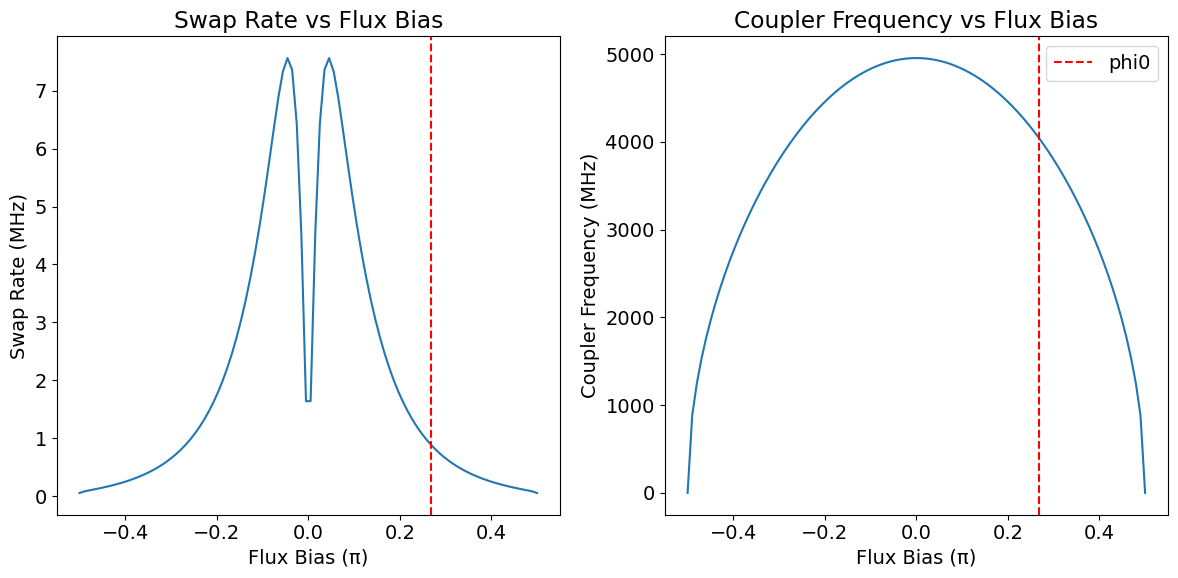

In [97]:
flux_biases = np.linspace(-0.5, 0.5, 100) * np.pi
swap_rates = [swap_rate_for_phi(phi) for phi in flux_biases]
coup_freqs = [coup_freq(phi) for phi in flux_biases]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot swap rates
ax1.plot(flux_biases/np.pi, swap_rates)
ax1.set_xlabel('Flux Bias (π)')
ax1.set_ylabel('Swap Rate (MHz)')
ax1.set_title('Swap Rate vs Flux Bias')

# Plot coupler frequencies
ax2.plot(flux_biases/np.pi, coup_freqs)
ax2.set_xlabel('Flux Bias (π)')
ax2.set_ylabel('Coupler Frequency (MHz)')
ax2.set_title('Coupler Frequency vs Flux Bias')

# draw a vertical line in both plot s
ax1.axvline(x=phi0/np.pi, color='r', linestyle='--', label='phi0')
ax2.axvline(x=phi0/np.pi, color='r', linestyle='--', label='phi0')

# Adjust layout and show the plot
plt.legend()
plt.tight_layout()
plt.show()

Assumptions in above plot: 
1. Man and stor frequency don't shift with flux bias
2. we are using same drive power at all points

## What about Invserse Purcell
$$\kappa_{1,b} = \left(\frac{g_{b}}{\Delta_b}\right)^2 \kappa_c + \kappa_{1,b,\text{int}}$$


In [86]:
#determining kappa_intrinsic 
kappa_b = 1/200 
kappa_c = 1/40 
kappa_s = 1/1100

inv_limit_man = coup_man_part[man_idx] **2 * kappa_c
inv_limit_stor = coup_stor_part[stor_idx] **2 * kappa_c



kappa_int_s = kappa_s - inv_limit_stor
kappa_int_b = kappa_b - inv_limit_man

print('Intrinsic t1 for storage:', 1/kappa_int_s)
print('Intrinsic t1 for buffer:', 1/kappa_int_b)
    

Intrinsic t1 for storage: 1372.8924895992993
Intrinsic t1 for buffer: 229.19179734620025


In [139]:
def kappa_for_phi(phi, isman = False, isstor = False): 
    '''$$kappa  = \kappa_{int} + \frac{g^2}{\Delta^2} \kappa_{c}$$'''
    if isman:
        detuning = coup_freq(phi) - freq_man[man_idx] 
        g = coup_man_g[man_idx]
        kappa_int = kappa_int_b
        print(g**2/detuning**2 * kappa_c)
    elif isstor:
        detuning = coup_freq(phi) - freq_stor[stor_idx]
        g = coup_stor_g[stor_idx]
        kappa_int = kappa_int_s
    return kappa_int + g**2/detuning**2 * kappa_c

In [140]:
kappa_for_phi(phi0, isman=True)

0.000636842105263158


0.005

In [142]:
coup_man_g[man_idx]

151.14572194791984

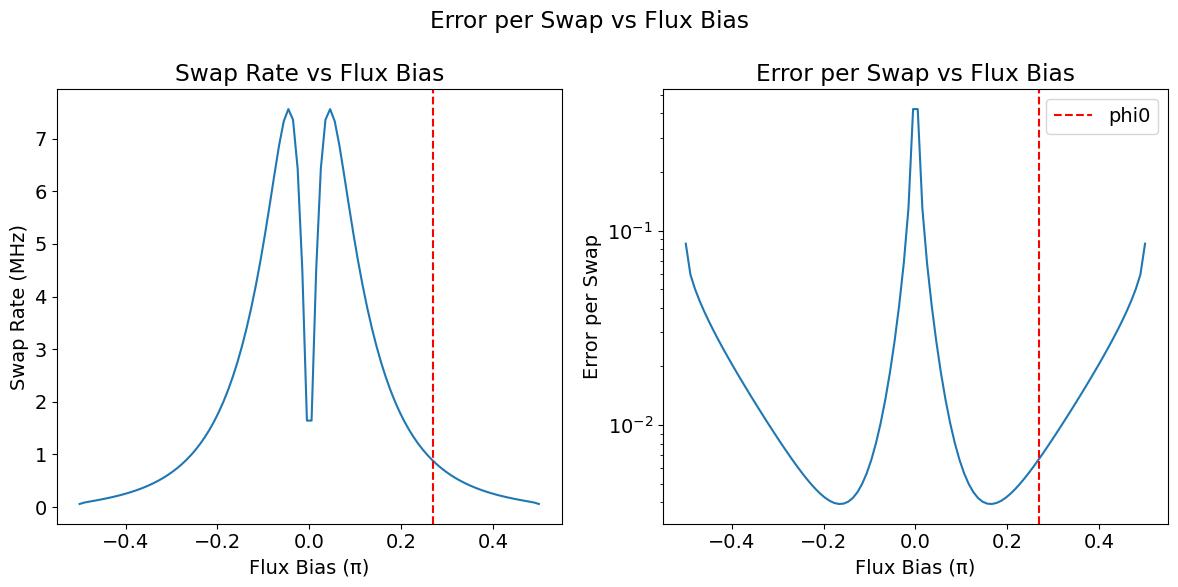

In [98]:
# now that we have intrinsic t1s, we can calcylate error per swap purely from mode t1 

flux_biases = np.linspace(-0.5, 0.5, 100) * np.pi
t1s_man = 1/kappa_for_phi(flux_biases, isman=True)
t1s_stor = 1/kappa_for_phi(flux_biases, isstor=True)
swap_rates = [swap_rate_for_phi(phi) for phi in flux_biases]
swap_times = 1/np.array(swap_rates)

# calculate error per swap
errors = swap_times/t1s_man + swap_times/t1s_stor

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle('Error per Swap vs Flux Bias')

# Plot swap rates
ax1.plot(flux_biases/np.pi, swap_rates)
ax1.set_xlabel('Flux Bias (π)')
ax1.set_ylabel('Swap Rate (MHz)')
ax1.set_title('Swap Rate vs Flux Bias')

# Plot error per swap
ax2.plot(flux_biases/np.pi, errors)
ax2.set_xlabel('Flux Bias (π)')
ax2.set_ylabel('Error per Swap')
ax2.set_title('Error per Swap vs Flux Bias')
ax2.set_yscale('log')

# draw a vertical line in both plot s
ax1.axvline(x=phi0/np.pi, color='r', linestyle='--', label='phi0')
ax2.axvline(x=phi0/np.pi, color='r', linestyle='--', label='phi0')

# Adjust layout and show the plot
plt.legend()
plt.tight_layout()
plt.show()


In [89]:
t1s_man

array([227.99038726, 227.42202742, 227.06238524, 226.7074881 ,
       226.33590365, 225.93670176, 225.50157322, 225.02278078,
       224.49232977, 223.90150155, 223.24050768, 222.49817551,
       221.66162486, 220.71591267, 219.64363008, 218.42443971,
       217.03454323, 215.44607227, 213.62640035, 211.53738147,
       209.13453476, 206.36621615, 203.17285264, 199.48636555,
       195.22998304, 190.31874248, 184.66110988, 178.16228634,
       170.72989647, 162.28279432, 152.76355903, 142.15472209,
       130.49770009, 117.91175016, 104.60828269,  90.89433821,
        77.15922011,  63.84134781,  51.37837517,  40.15050079,
        30.43113246,  22.35777115,  15.92929302,  11.02713759,
         7.4515357 ,   4.96213044,   3.31457377,   2.28868224,
         1.7073925 ,   1.44800862,   1.44800862,   1.7073925 ,
         2.28868224,   3.31457377,   4.96213044,   7.4515357 ,
        11.02713759,  15.92929302,  22.35777115,  30.43113246,
        40.15050079,  51.37837517,  63.84134781,  77.15

## What about Cross Kerrs
$$\chi_{bs} = \frac{g_b g_s}{\Delta_b \Delta_s}\alpha$$

In [119]:
def cross_kerr_for_phi(phi):
    '''$ \chi = \frac{g_b g_s}{\Delta_b \Delta_s}}\alpha $'''
    detuning_man = coup_freq(phi) - freq_man[man_idx] 
    g_man = coup_man_g[man_idx]
    part_man= g_man/detuning_man
    
    detuning_stor = coup_freq(phi) - freq_stor[stor_idx]
    g_stor = coup_stor_g[stor_idx]
    part_stor = g_stor/detuning_stor

    anh = 57
    print(part_man)
    print(part_stor)

    return (part_man * part_stor)**2 * anh /2 # factor of 2 from expts

-0.030326188427744726
-0.022671482276323845
-0.03685297921709235
-0.027000859033408497
-0.04045644543088478
-0.02931787382579036
-0.043732102362711536
-0.03138070722520693
-0.046927212084793245
-0.03335418553618305
-0.05014399614977064
-0.0353036094406004
-0.05344191901748479
-0.03726430548664197
-0.05686355758298638
-0.03925915753651151
-0.06044411675922663
-0.0413049644646477
-0.06421580556190333
-0.04341525940852541
-0.06821022849571294
-0.04560173692527098
-0.0724599149353746
-0.04787504759352834
-0.07699945768972437
-0.050245273160202136
-0.08186648754280913
-0.052722226131321125
-0.08710260891681587
-0.05531564538733867
-0.09275437734905573
-0.05803532542203418
-0.0988743808372223
-0.06089119950564595
-0.10552248174493352
-0.06389338758986254
-0.11276727869204706
-0.06705221416352142
-0.12068785672438456
-0.07037819765823712
-0.12937590874879498
-0.07388201044898604
-0.13893833245974033
-0.07757440650027123
-0.14950043638672444
-0.08146611200915935
-0.16120992884167695
-0.0855676

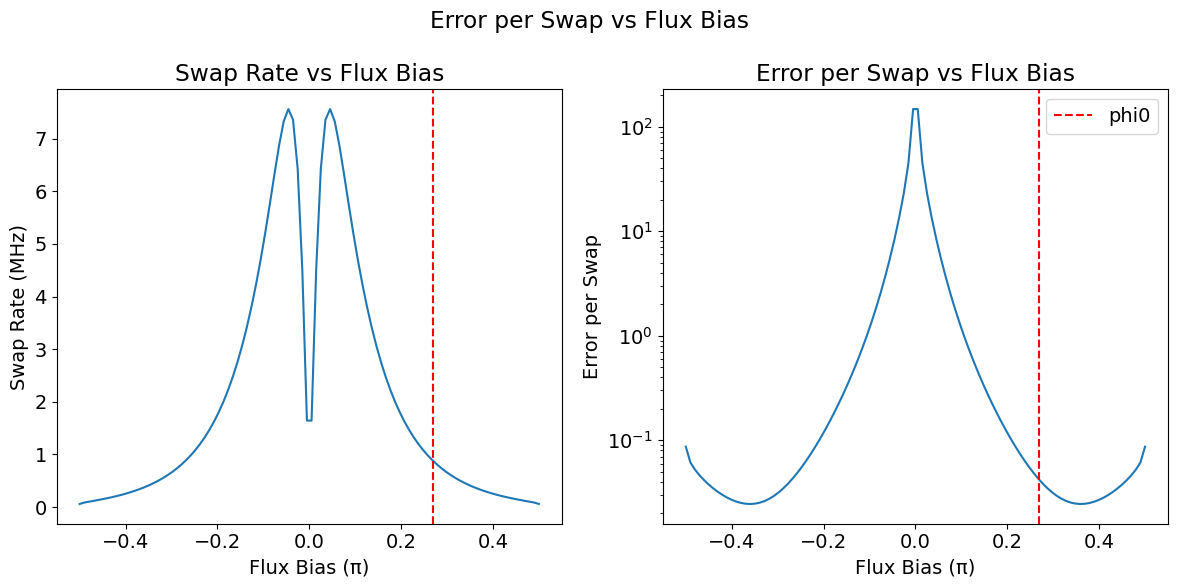

In [136]:
flux_biases = np.linspace(-0.5, 0.5, 100) * np.pi
cross_kerrs = np.array([cross_kerr_for_phi(phi) for phi in flux_biases])
t1s_man = 1/kappa_for_phi(flux_biases, isman=True)
t1s_stor = 1/kappa_for_phi(flux_biases, isstor=True)
swap_rates = [swap_rate_for_phi(phi) for phi in flux_biases]
swap_times = 1/np.array(swap_rates)

# calculate error per swap
errors = (swap_times/t1s_man) + (swap_times/t1s_stor) + (6*cross_kerrs*swap_times)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle('Error per Swap vs Flux Bias')

# Plot swap rates
ax1.plot(flux_biases/np.pi, swap_rates)
ax1.set_xlabel('Flux Bias (π)')
ax1.set_ylabel('Swap Rate (MHz)')
ax1.set_title('Swap Rate vs Flux Bias')

# Plot error per swap
ax2.plot(flux_biases/np.pi, errors)
ax2.set_xlabel('Flux Bias (π)')
ax2.set_ylabel('Error per Swap')
ax2.set_title('Error per Swap vs Flux Bias')
ax2.set_yscale('log')

# draw a vertical line in both plot s
ax1.axvline(x=phi0/np.pi, color='r', linestyle='--', label='phi0')
ax2.axvline(x=phi0/np.pi, color='r', linestyle='--', label='phi0')

# Adjust layout and show the plot
plt.legend()
plt.tight_layout()
plt.show()

In [133]:
# (swap_times/t1s_man) + 
# (swap_times/t1s_stor) +
cross_kerrs

[1.3472256697412002e-05,
 2.8219234430012924e-05,
 4.0094541132462156e-05,
 5.3674873061580653e-05,
 6.982244428143752e-05,
 8.931429258314161e-05,
 0.00011303033432216284,
 0.00014203483334396252,
 0.00017764681986677625,
 0.0002215202998305903,
 0.000275744360085902,
 0.0003429722141512126,
 0.0004265899464583199,
 0.0005309390324879644,
 0.000661611665754496,
 0.0008258449868239749,
 0.001033050310524642,
 0.00129552763955101,
 0.0016294360001558187,
 0.0020561192110182726,
 0.0026039287474606443,
 0.003310746644352519,
 0.004227501405880467,
 0.005423103265839028,
 0.006991424518661197,
 0.009061251511823529,
 0.011810593488959268,
 0.015487439940679573,
 0.020440158724950964,
 0.027162462358021475,
 0.03636063992363044,
 0.04905523293441131,
 0.06673668207410773,
 0.09160669474395663,
 0.12695770513804505,
 0.17777807428196218,
 0.25173178267023827,
 0.36076826030147535,
 0.5238058193844128,
 0.7712602063105565,
 1.152747448454707,
 1.7501693705542278,
 2.69950206979356,
 4.224918

In [126]:
swap_times/t1s_man

array([0.07322973, 0.05075019, 0.04270823, 0.03706327, 0.03266489,
       0.02906475, 0.02603137, 0.02342633, 0.02115883, 0.01916543,
       0.0173997 , 0.01582641, 0.0144181 , 0.01315289, 0.012013  ,
       0.01098379, 0.01005305, 0.0092105 , 0.00844741, 0.00775633,
       0.00713086, 0.00656554, 0.00605568, 0.00559727, 0.00518699,
       0.0048221 , 0.00450046, 0.00422056, 0.00398154, 0.00378333,
       0.00362675, 0.00351377, 0.0034478 , 0.00343426, 0.00348127,
       0.00360081, 0.00381053, 0.00413649, 0.00461773, 0.00531367,
       0.00631683, 0.00777501, 0.00993156, 0.01320104, 0.01831875,
       0.02665851, 0.04100247, 0.06794213, 0.12967592, 0.42014768,
       0.42014768, 0.12967592, 0.06794213, 0.04100247, 0.02665851,
       0.01831875, 0.01320104, 0.00993156, 0.00777501, 0.00631683,
       0.00531367, 0.00461773, 0.00413649, 0.00381053, 0.00360081,
       0.00348127, 0.00343426, 0.0034478 , 0.00351377, 0.00362675,
       0.00378333, 0.00398154, 0.00422056, 0.00450046, 0.00482

In [125]:
swap_times/t1s_stor

array([0.01237549, 0.00861722, 0.00727189, 0.00632716, 0.00559078,
       0.00498779, 0.00447951, 0.00404279, 0.00366244, 0.00332785,
       0.00303123, 0.00276669, 0.0025296 , 0.00231629, 0.00212375,
       0.00194951, 0.00179149, 0.00164791, 0.00151728, 0.00139828,
       0.00128976, 0.00119074, 0.00110031, 0.00101769, 0.00094217,
       0.0008731 , 0.00080991, 0.00075207, 0.00069908, 0.00065051,
       0.00060593, 0.00056498, 0.00052728, 0.00049251, 0.00046038,
       0.0004306 , 0.00040296, 0.00037723, 0.00035329, 0.00033105,
       0.00031054, 0.00029191, 0.00027556, 0.00026227, 0.00025353,
       0.00025226, 0.00026488, 0.0003082 , 0.00044388, 0.00122675,
       0.00122675, 0.00044388, 0.0003082 , 0.00026488, 0.00025226,
       0.00025353, 0.00026227, 0.00027556, 0.00029191, 0.00031054,
       0.00033105, 0.00035329, 0.00037723, 0.00040296, 0.0004306 ,
       0.00046038, 0.00049251, 0.00052728, 0.00056498, 0.00060593,
       0.00065051, 0.00069908, 0.00075207, 0.00080991, 0.00087

In [100]:
alpha

NameError: name 'alpha' is not defined